<a href="https://colab.research.google.com/github/vipulcvaru/SoftwareLAB/blob/main/BIO_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install category_encoders imblearn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.0/82.0 kB 2.3 MB/s eta 0:00:00


In [ ]:
import warnings
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model, svm, model_selection, tree, ensemble, neighbors, preprocessing, base, metrics
import category_encoders
import imblearn


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import (
    classification_report, confusion_matrix, roc_auc_score, accuracy_score, f1_score
)
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

In [ ]:
df = pd.read_csv("/content/METABRIC_RNA_Mutation.csv")
df.shape

<ipython-input-51-d9901f01ac07>:1: DtypeWarning: Columns (678,688,690,692) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("/content/METABRIC_RNA_Mutation.csv")


(1904, 693)

In [ ]:
df.sample(5)

,patient_id,age_at_diagnosis,type_of_breast_surgery,cancer_type,cancer_type_detailed,cellularity,chemotherapy,pam50_+_claudin-low_subtype,cohort,er_status_measured_by_ihc,...,mtap_mut,ppp2cb_mut,smarcd1_mut,nras_mut,ndfip1_mut,hras_mut,prps2_mut,smarcb1_mut,stmn2_mut,siah1_mut
1669,7001,72.71,BREAST CONSERVING,Breast Cancer,Breast Invasive Ductal Carcinoma,High,0,LumA,4.0,Positve,...,0,0,0,0,0,0,0,0,0,0
39,113,36.96,MASTECTOMY,Breast Cancer,Breast Invasive Ductal Carcinoma,Low,1,Her2,1.0,Positve,...,0,0,0,0,0,0,0,0,0,0
1306,5347,56.89,BREAST CONSERVING,Breast Cancer,Breast Invasive Ductal Carcinoma,High,0,LumB,3.0,Positve,...,0,0,0,0,0,0,0,0,0,0
1192,5174,54.69,MASTECTOMY,Breast Cancer,Breast Invasive Ductal Carcinoma,High,0,Her2,3.0,NaN,...,0,0,0,0,0,0,0,0,0,0
1634,6271,64.40,BREAST CONSERVING,Breast Cancer,Breast Invasive Ductal Carcinoma,High,0,LumA,5.0,Positve,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
df.describe()

,patient_id,age_at_diagnosis,chemotherapy,cohort,neoplasm_histologic_grade,hormone_therapy,lymph_nodes_examined_positive,mutation_count,nottingham_prognostic_index,overall_survival_months,...,srd5a1,srd5a2,srd5a3,st7,star,tnk2,tulp4,ugt2b15,ugt2b17,ugt2b7
count,1904.000000,1904.000000,1904.000000,1904.000000,1832.000000,1904.000000,1904.000000,1859.000000,1904.000000,1904.000000,...,1.904000e+03,1.904000e+03,1.904000e+03,1.904000e+03,1904.000000,1.904000e+03,1.904000e+03,1.904000e+03,1904.000000,1.904000e+03
mean,3921.982143,61.087054,0.207983,2.643908,2.415939,0.616597,2.002101,5.697687,4.033019,125.121324,...,4.726891e-07,-3.676471e-07,-9.453782e-07,-1.050420e-07,-0.000002,3.676471e-07,4.726891e-07,7.878151e-07,0.000000,3.731842e-18
std,2358.478332,12.978711,0.405971,1.228615,0.650612,0.486343,4.079993,4.058778,1.144492,76.334148,...,1.000263e+00,1.000262e+00,1.000262e+00,1.000263e+00,1.000262,1.000264e+00,1.000262e+00,1.000263e+00,1.000262,1.000262e+00
min,0.000000,21.930000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,...,-2.120800e+00,-3.364800e+00,-2.719400e+00,-4.982700e+00,-2.981700,-3.833300e+00,-3.609300e+00,-1.166900e+00,-2.112600,-1.051600e+00
25%,896.500000,51.375000,0.000000,1.000000,2.000000,0.000000,0.000000,3.000000,3.046000,60.825000,...,-6.188500e-01,-6.104750e-01,-6.741750e-01,-6.136750e-01,-0.632900,-6.664750e-01,-7.102000e-01,-5.058250e-01,-0.476200,-7.260000e-01
50%,4730.500000,61.770000,0.000000,3.000000,3.000000,1.000000,0.000000,5.000000,4.042000,115.616667,...,-2.456500e-01,-4.690000e-02,-1.422500e-01,-5.175000e-02,-0.026650,7.000000e-04,-2.980000e-02,-2.885500e-01,-0.133400,-4.248000e-01
75%,5536.250000,70.592500,0.000000,3.000000,3.000000,1.000000,2.000000,7.000000,5.040250,184.716667,...,3.306000e-01,5.144500e-01,5.146000e-01,5.787750e-01,0.590350,6.429000e-01,5.957250e-01,6.022500e-02,0.270375,4.284000e-01
max,7299.000000,96.290000,1.000000,5.000000,3.000000,1.000000,45.000000,80.000000,6.360000,355.200000,...,6.534900e+00,1.027030e+01,6.329000e+00,4.571300e+00,12.742300,3.938800e+00,3.833400e+00,1.088490e+01,12.643900,3.284400e+00


In [ ]:
#Finding missing data and precentage of it in each column
df.isnull().count()

,0
patient_id,1904
age_at_diagnosis,1904
type_of_breast_surgery,1904
cancer_type,1904
cancer_type_detailed,1904
...,...
hras_mut,1904
prps2_mut,1904
smarcb1_mut,1904
stmn2_mut,1904


In [ ]:
(df.isnull().sum()).sum()

1100

In [ ]:
df = df.set_index('patient_id')
df

,age_at_diagnosis,type_of_breast_surgery,cancer_type,cancer_type_detailed,cellularity,chemotherapy,pam50_+_claudin-low_subtype,cohort,er_status_measured_by_ihc,er_status,...,mtap_mut,ppp2cb_mut,smarcd1_mut,nras_mut,ndfip1_mut,hras_mut,prps2_mut,smarcb1_mut,stmn2_mut,siah1_mut
patient_id,,,,,,,,,,,,,,,,,,,,,
0,75.65,MASTECTOMY,Breast Cancer,Breast Invasive Ductal Carcinoma,NaN,0,claudin-low,1.0,Positve,Positive,...,0,0,0,0,0,0,0,0,0,0
2,43.19,BREAST CONSERVING,Breast Cancer,Breast Invasive Ductal Carcinoma,High,0,LumA,1.0,Positve,Positive,...,0,0,0,0,0,0,0,0,0,0
5,48.87,MASTECTOMY,Breast Cancer,Breast Invasive Ductal Carcinoma,High,1,LumB,1.0,Positve,Positive,...,0,0,0,0,0,0,0,0,0,0
6,47.68,MASTECTOMY,Breast Cancer,Breast Mixed Ductal and Lobular Carcinoma,Moderate,1,LumB,1.0,Positve,Positive,...,0,0,0,0,0,0,0,0,0,0
8,76.97,MASTECTOMY,Breast Cancer,Breast Mixed Ductal and Lobular Carcinoma,High,1,LumB,1.0,Positve,Positive,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7295,43.10,BREAST CONSERVING,Breast Cancer,Breast Invasive Lobular Carcinoma,High,0,LumA,4.0,Positve,Positive,...,0,0,0,0,0,0,0,0,0,0
7296,42.88,MASTECTOMY,Breast Cancer,Breast Invasive Ductal Carcinoma,High,0,LumB,4.0,Positve,Positive,...,0,0,0,0,0,0,0,0,0,0
7297,62.90,MASTECTOMY,Breast Cancer,Breast Invasive Ductal Carcinoma,High,0,LumB,4.0,Positve,Positive,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
df_expression = df.iloc[:, 30:519].join(df['overall_survival'], how='inner')

In [ ]:
df

,age_at_diagnosis,type_of_breast_surgery,cancer_type,cancer_type_detailed,cellularity,chemotherapy,pam50_+_claudin-low_subtype,cohort,er_status_measured_by_ihc,er_status,...,mtap_mut,ppp2cb_mut,smarcd1_mut,nras_mut,ndfip1_mut,hras_mut,prps2_mut,smarcb1_mut,stmn2_mut,siah1_mut
patient_id,,,,,,,,,,,,,,,,,,,,,
0,75.65,MASTECTOMY,Breast Cancer,Breast Invasive Ductal Carcinoma,NaN,0,claudin-low,1.0,Positve,Positive,...,0,0,0,0,0,0,0,0,0,0
2,43.19,BREAST CONSERVING,Breast Cancer,Breast Invasive Ductal Carcinoma,High,0,LumA,1.0,Positve,Positive,...,0,0,0,0,0,0,0,0,0,0
5,48.87,MASTECTOMY,Breast Cancer,Breast Invasive Ductal Carcinoma,High,1,LumB,1.0,Positve,Positive,...,0,0,0,0,0,0,0,0,0,0
6,47.68,MASTECTOMY,Breast Cancer,Breast Mixed Ductal and Lobular Carcinoma,Moderate,1,LumB,1.0,Positve,Positive,...,0,0,0,0,0,0,0,0,0,0
8,76.97,MASTECTOMY,Breast Cancer,Breast Mixed Ductal and Lobular Carcinoma,High,1,LumB,1.0,Positve,Positive,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7295,43.10,BREAST CONSERVING,Breast Cancer,Breast Invasive Lobular Carcinoma,High,0,LumA,4.0,Positve,Positive,...,0,0,0,0,0,0,0,0,0,0
7296,42.88,MASTECTOMY,Breast Cancer,Breast Invasive Ductal Carcinoma,High,0,LumB,4.0,Positve,Positive,...,0,0,0,0,0,0,0,0,0,0
7297,62.90,MASTECTOMY,Breast Cancer,Breast Invasive Ductal Carcinoma,High,0,LumB,4.0,Positve,Positive,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
# Dictionary to store F1 and accuracy scores of each model
metrics_summary = {"Model": [], "F1 Score": [], "Accuracy": []}

In [ ]:
# Function to evaluate and display results


def evaluate_model(model, X_train, X_test, y_train, y_test, model_name):
    model.fit(X_train, y_train)

    # Predictions and probabilities (if applicable)
    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)[:, 1] if hasattr(
        model, 'predict_proba') else None

    # Calculate metrics
    f1 = f1_score(y_test, y_pred, average='weighted')
    accuracy = accuracy_score(y_test, y_pred)

    # Store the metrics
    metrics_summary["Model"].append(model_name)
    metrics_summary["F1 Score"].append(f1)
    metrics_summary["Accuracy"].append(accuracy)

    # Display classification metrics
    print(f"\n=== {model_name} ===")
    print("Classification Report:\n", classification_report(y_test, y_pred))
    print(f"Accuracy: {accuracy:.4f}")
    print(f"F1 Score: {f1:.4f}")

    # Confusion Matrix Visualization
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=[
                'Pred 0', 'Pred 1'], yticklabels=['True 0', 'True 1'])
    plt.title(f'Confusion Matrix - {model_name}')
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.show()

    # AUC-ROC Score (if applicable)
    if y_proba is not None:
        print(f"AUC-ROC Score: {roc_auc_score(y_test, y_proba):.4f}")



=== Logistic Regression ===
Classification Report:
               precision    recall  f1-score   support

           0       0.66      0.65      0.65       343
           1       0.48      0.49      0.49       229

    accuracy                           0.59       572
   macro avg       0.57      0.57      0.57       572
weighted avg       0.59      0.59      0.59       572

Accuracy: 0.5857
F1 Score: 0.5864


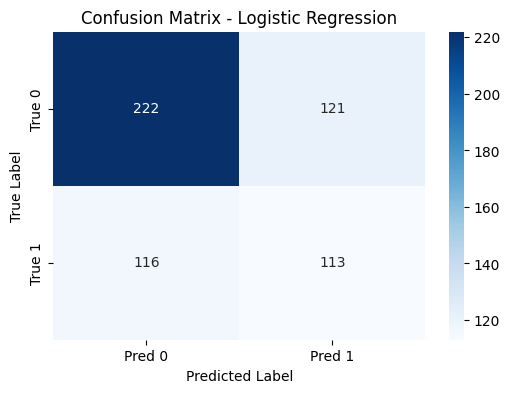

AUC-ROC Score: 0.5946

=== Random Forest ===
Classification Report:
               precision    recall  f1-score   support

           0       0.66      0.81      0.73       343
           1       0.57      0.38      0.45       229

    accuracy                           0.64       572
   macro avg       0.61      0.59      0.59       572
weighted avg       0.62      0.64      0.62       572

Accuracy: 0.6364
F1 Score: 0.6176


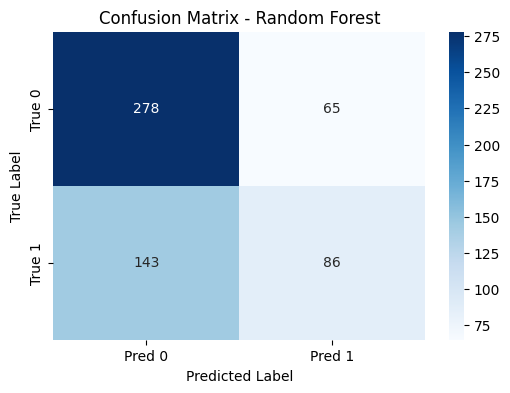

AUC-ROC Score: 0.6476

=== Gradient Boosting ===
Classification Report:
               precision    recall  f1-score   support

           0       0.68      0.74      0.71       343
           1       0.55      0.48      0.51       229

    accuracy                           0.64       572
   macro avg       0.62      0.61      0.61       572
weighted avg       0.63      0.64      0.63       572

Accuracy: 0.6364
F1 Score: 0.6308


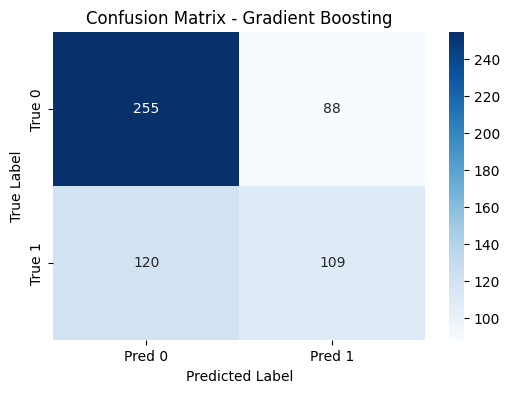

AUC-ROC Score: 0.6471


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(



=== AdaBoost ===
Classification Report:
               precision    recall  f1-score   support

           0       0.68      0.69      0.69       343
           1       0.52      0.51      0.52       229

    accuracy                           0.62       572
   macro avg       0.60      0.60      0.60       572
weighted avg       0.62      0.62      0.62       572

Accuracy: 0.6189
F1 Score: 0.6177


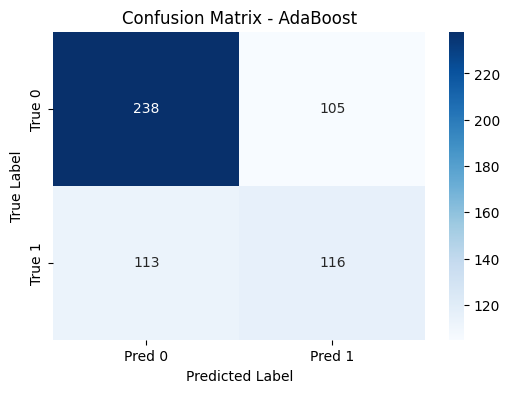

AUC-ROC Score: 0.6280

=== K-Nearest Neighbors ===
Classification Report:
               precision    recall  f1-score   support

           0       0.67      0.65      0.66       343
           1       0.50      0.53      0.52       229

    accuracy                           0.60       572
   macro avg       0.59      0.59      0.59       572
weighted avg       0.61      0.60      0.60       572

Accuracy: 0.6031
F1 Score: 0.6046


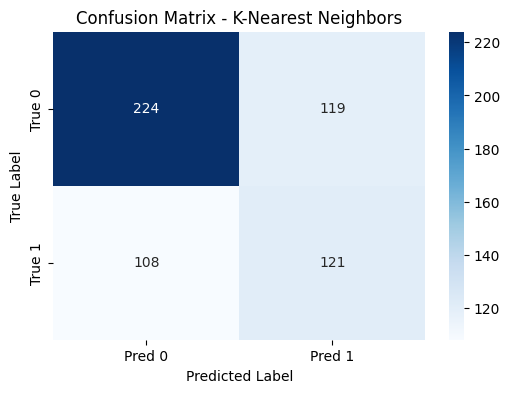

AUC-ROC Score: 0.6137

=== Support Vector Classifier ===
Classification Report:
               precision    recall  f1-score   support

           0       0.68      0.79      0.73       343
           1       0.59      0.45      0.51       229

    accuracy                           0.66       572
   macro avg       0.64      0.62      0.62       572
weighted avg       0.65      0.66      0.65       572

Accuracy: 0.6556
F1 Score: 0.6454


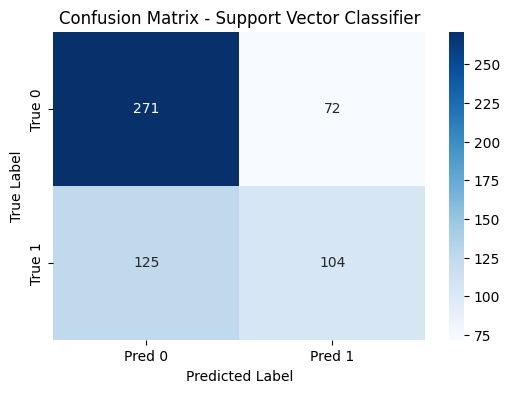

AUC-ROC Score: 0.6740

=== Decision Tree ===
Classification Report:
               precision    recall  f1-score   support

           0       0.64      0.61      0.62       343
           1       0.45      0.49      0.47       229

    accuracy                           0.56       572
   macro avg       0.55      0.55      0.55       572
weighted avg       0.57      0.56      0.56       572

Accuracy: 0.5594
F1 Score: 0.5618


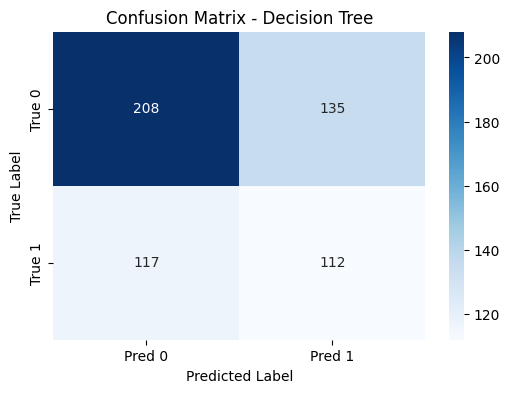

AUC-ROC Score: 0.5477


<ipython-input-83-44eafc12eda9>:35: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=metrics_summary["Model"],


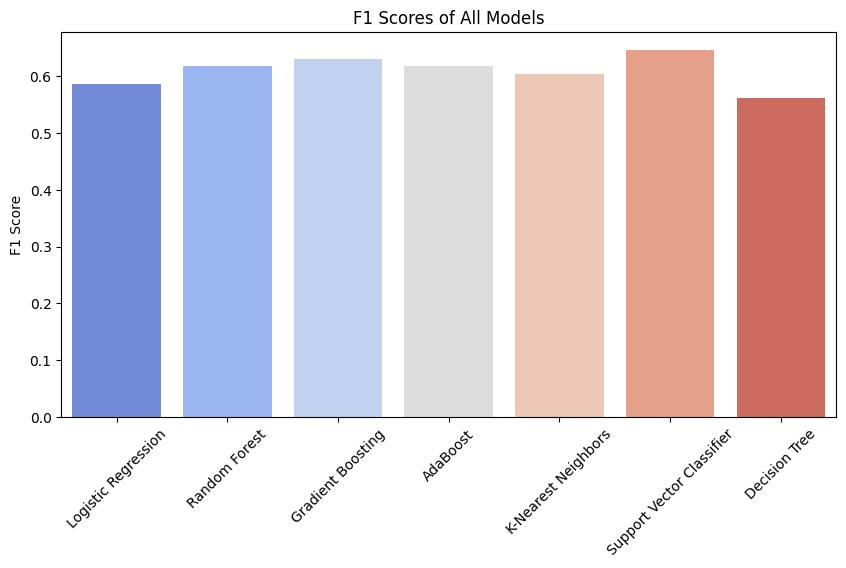

<ipython-input-83-44eafc12eda9>:44: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=metrics_summary["Model"],


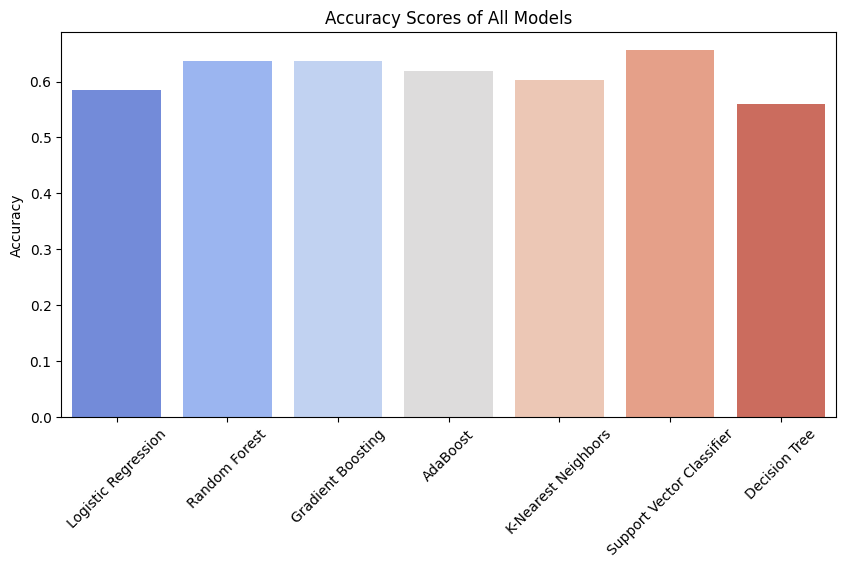

In [ ]:
# Main function to process the dataset and evaluate models


def main(df, target_column):
    # Prepare the dataset
    X = df.drop(target_column, axis=1)
    y = df[target_column]

    # Handle categorical variables
    X = pd.get_dummies(X, drop_first=True)
    if y.dtype == 'object':
        y = LabelEncoder().fit_transform(y)

    # Split the dataset
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.3, random_state=42)

    # Define classifiers to be evaluated
    models = {
        'Logistic Regression': LogisticRegression(max_iter=1000),
        'Random Forest': RandomForestClassifier(),
        'Gradient Boosting': GradientBoostingClassifier(),
        'AdaBoost': AdaBoostClassifier(),
        'K-Nearest Neighbors': KNeighborsClassifier(),
        'Support Vector Classifier': SVC(probability=True),
        'Decision Tree': DecisionTreeClassifier()
    }

    # Train and evaluate all models
    for name, model in models.items():
        evaluate_model(model, X_train, X_test, y_train, y_test, name)

    # Plot F1 Scores of all models
    plt.figure(figsize=(10, 5))
    sns.barplot(x=metrics_summary["Model"],
                y=metrics_summary["F1 Score"], palette='coolwarm')
    plt.xticks(rotation=45)
    plt.title('F1 Scores of All Models')
    plt.ylabel('F1 Score')
    plt.show()

    # Plot Accuracy Scores of all models
    plt.figure(figsize=(10, 5))
    sns.barplot(x=metrics_summary["Model"],
                y=metrics_summary["Accuracy"], palette='coolwarm')
    plt.xticks(rotation=45)
    plt.title('Accuracy Scores of All Models')
    plt.ylabel('Accuracy')
    plt.show()


# Load your dataset and specify the target column
if __name__ == "__main__":
    # Replace with your dataframe
    df = df_expression  # Example input dataframe
    target_column = 'overall_survival'  # Replace with the actual target column name
    main(df, target_column)